# Introduction

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score



In [2]:
import plotly.express as px
import plotly.graph_objs as go

In [3]:
# to read our data
heart = pd.read_csv(r'C:\Users\amuez\Downloads\heart.csv')
# displaying our entire dataset
display(heart)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# type of our data
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All values in our dataset has either integer or float value

In [5]:
# to find shape of our dataset
heart.shape

(303, 14)

This dataset has 303 rows and 14 columns.

In [6]:
# To find out basic statistical details
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here you can see some basic details of the dataset showing count, mean, standard deviation,minimum and many more.

In [7]:
# First five rows of our dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# checking if dataset have null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It seems that there is no null values in the dataset.

# EDA

In [9]:
#showing value count for patient having disease and not having disease
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

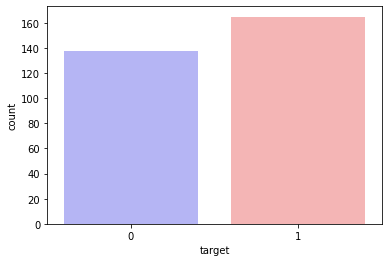

In [10]:
# graphical represenation of count
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

In [11]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [12]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients Not Having Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Having Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients Not Having Heart Disease: 45.54%
Percentage of Patients Having Heart Disease: 54.46%


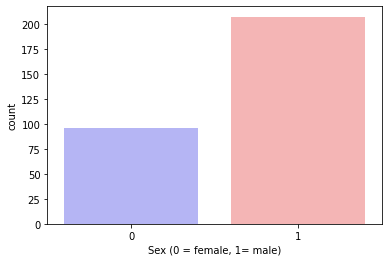

In [13]:
sns.countplot(x='sex', data=heart, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [14]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


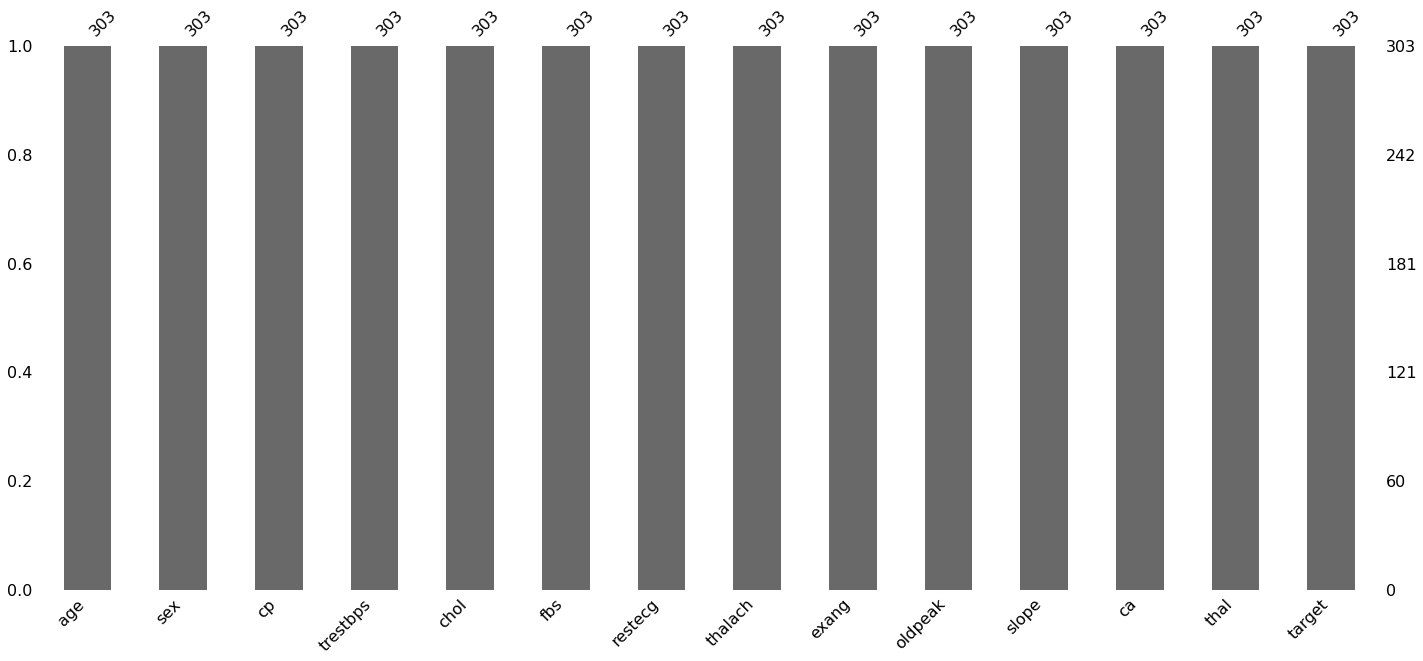

In [15]:
import missingno as msno
msno.bar(heart);

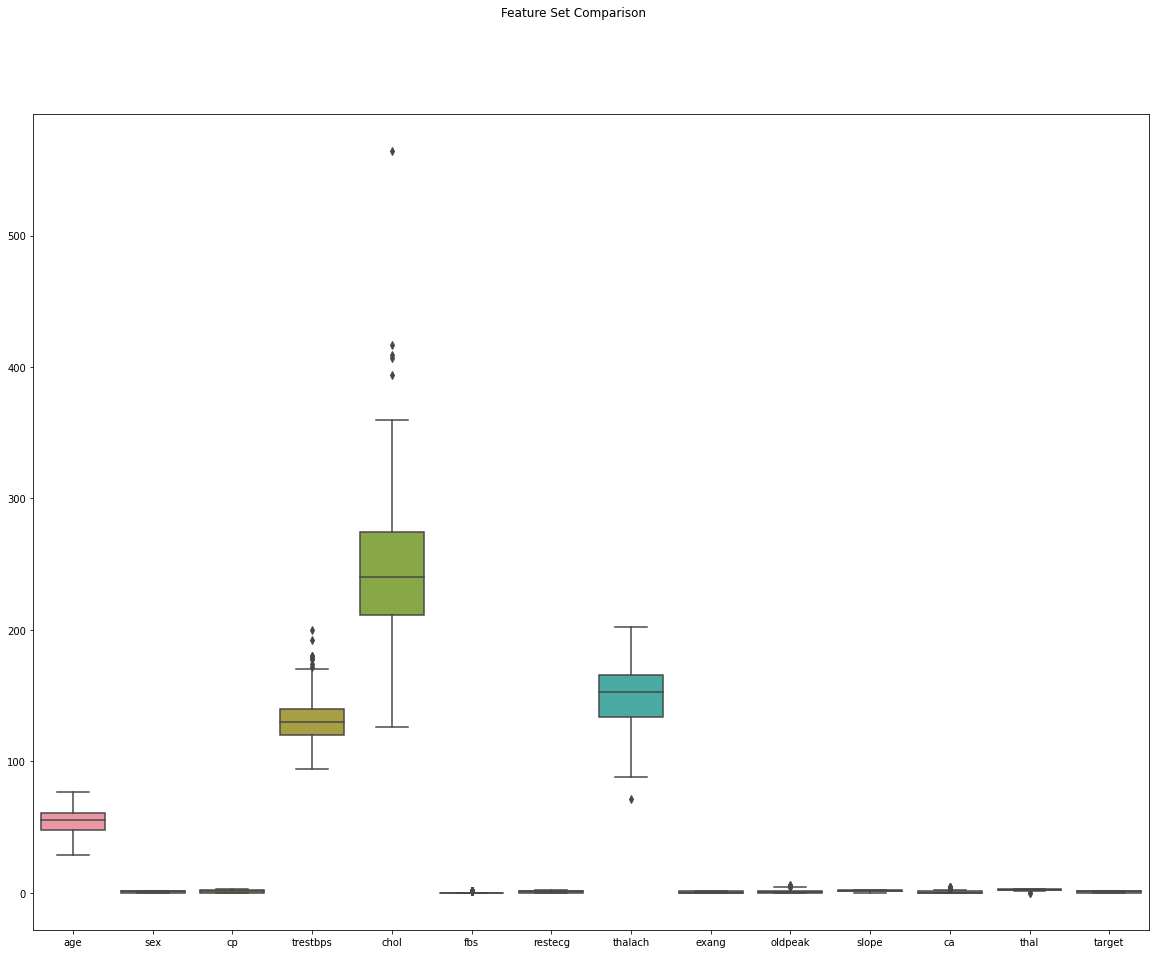

In [16]:
# To find out outliers in dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=heart)
plt.show()

In [17]:
import sweetviz as sv
heart_report = sv.analyze(heart)
#heart_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


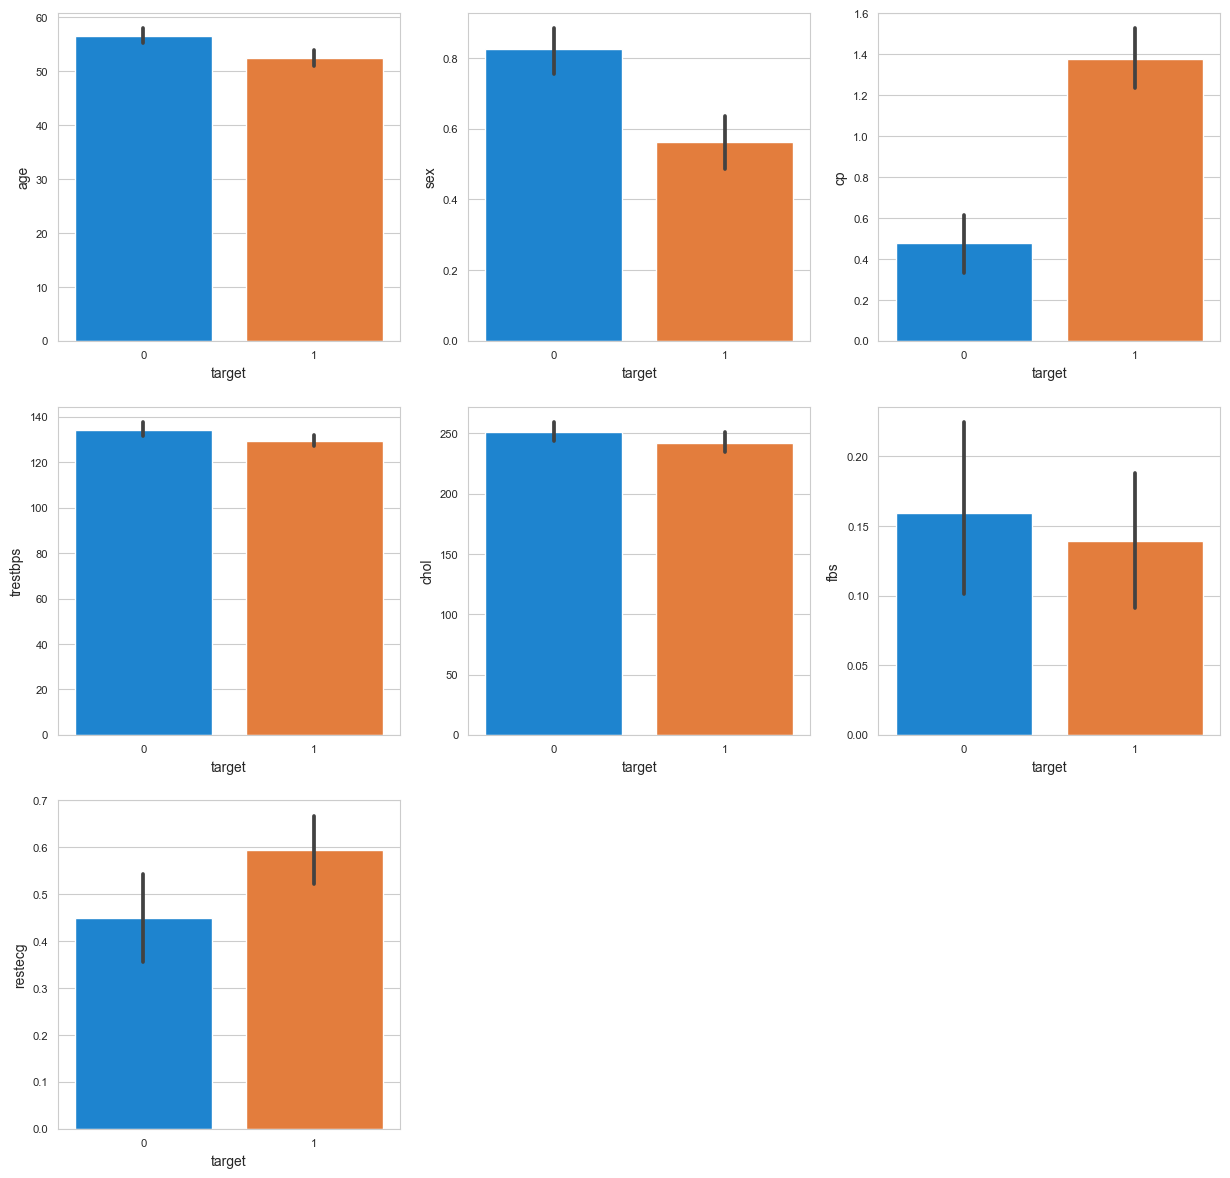

In [18]:
#Histrogram for each class
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['age','sex','cp','trestbps','chol','fbs','restecg']
cnt = 1
for col in cols:
    plt.subplot(4,3, cnt)
    sns.barplot(data = heart, x = 'target', y = col)
    cnt+=1
plt.show()

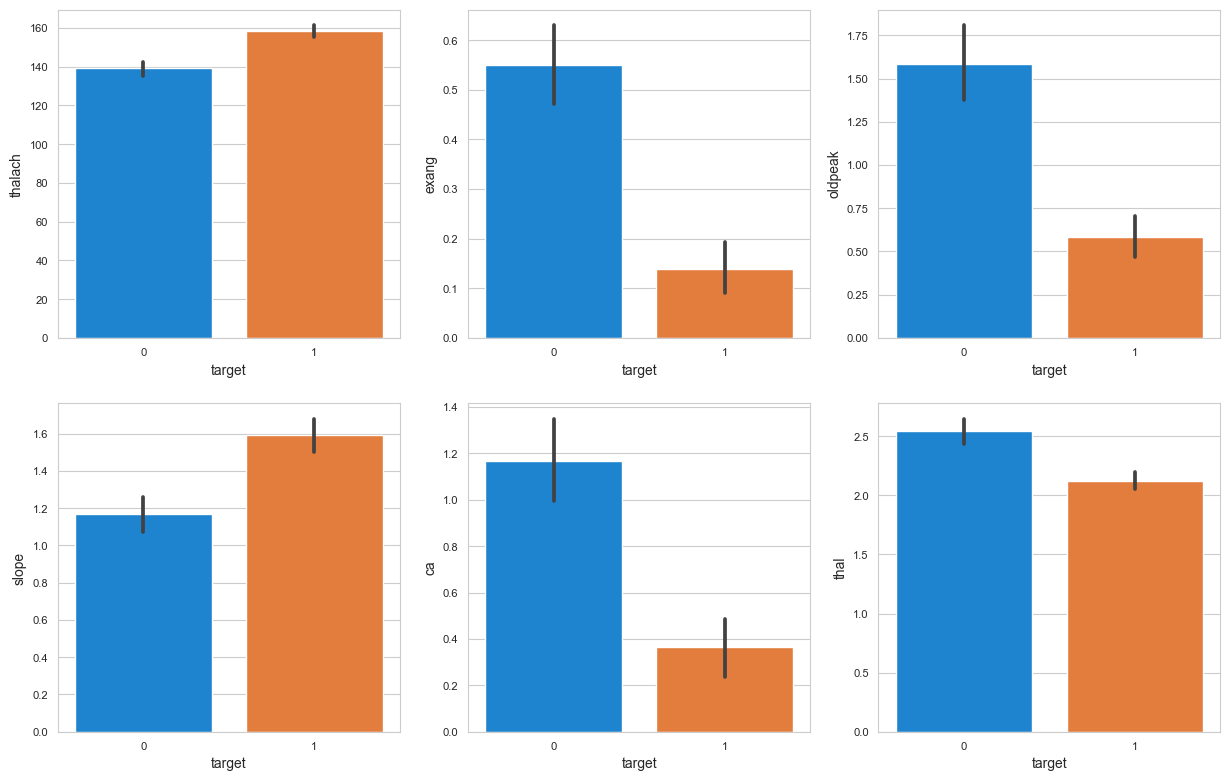

In [19]:

sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['thalach','exang','oldpeak','slope','ca','thal']
cnt = 1
for col in cols:
    plt.subplot(4,3, cnt)
    sns.barplot(data = heart, x = 'target', y = col)
    cnt+=1
plt.show()

<AxesSubplot:>

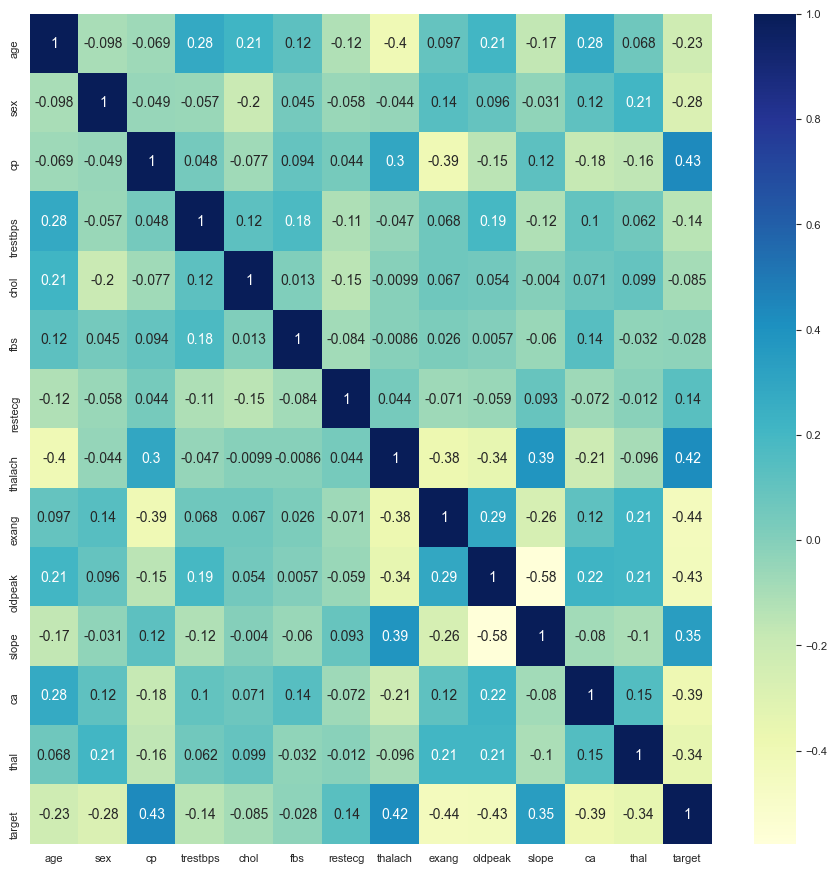

In [20]:
correlation = heart.corr()
plt.figure(1,figsize = (11,11))
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

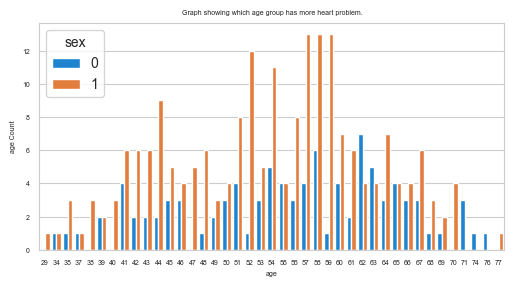

In [21]:
plt.figure(figsize=(6,3), facecolor='w')
sns.countplot(x="age",data=heart,hue="sex")
plt.title("Graph showing which age group has more heart problem.", size=5)
plt.xlabel("age", size=5)
plt.ylabel("age Count", size=5)
plt.xticks(size=5)
plt.yticks(size=5)

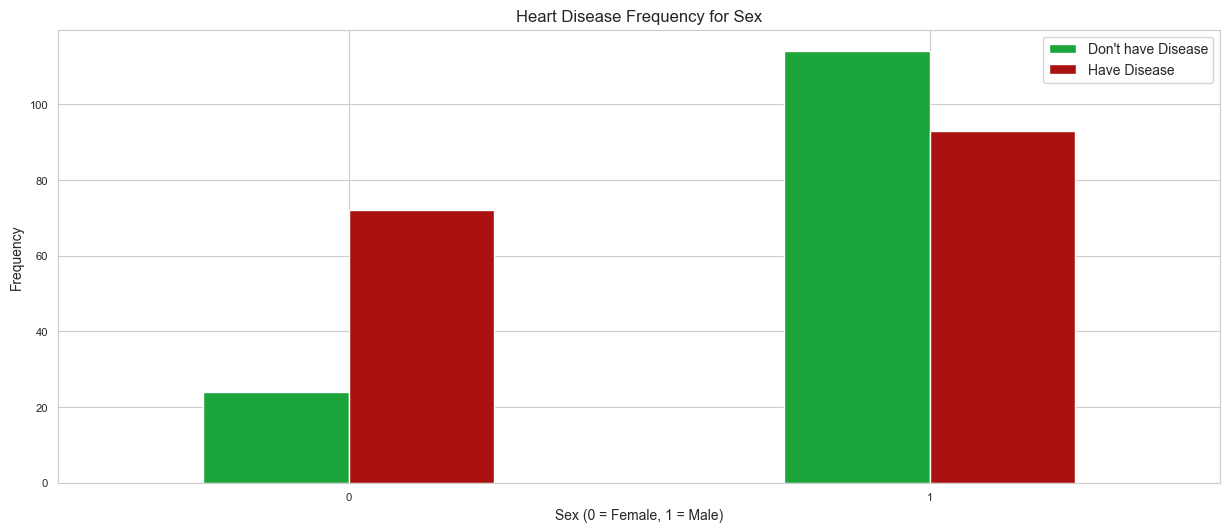

In [22]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

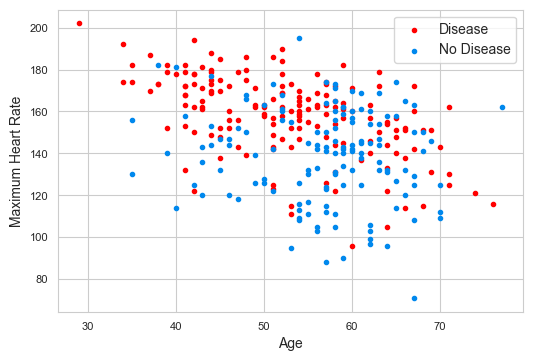

In [23]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


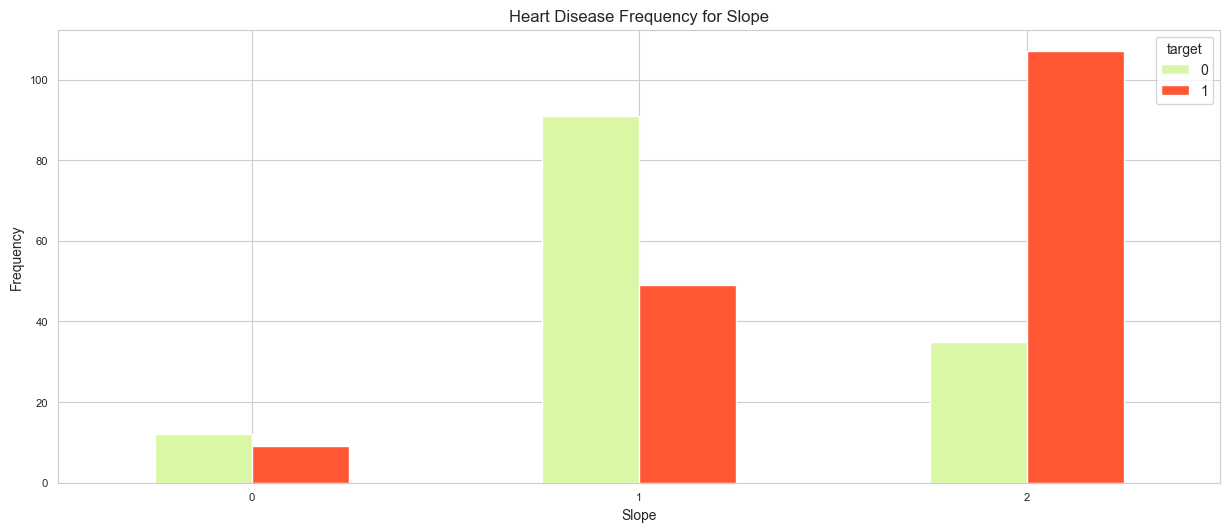

In [24]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


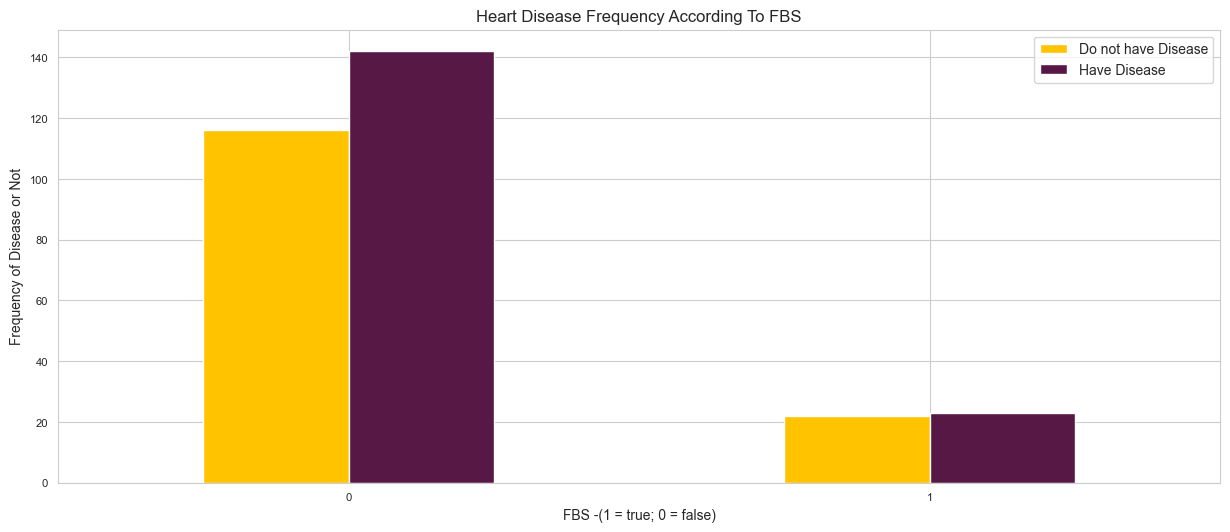

In [25]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS -(1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Do not have Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


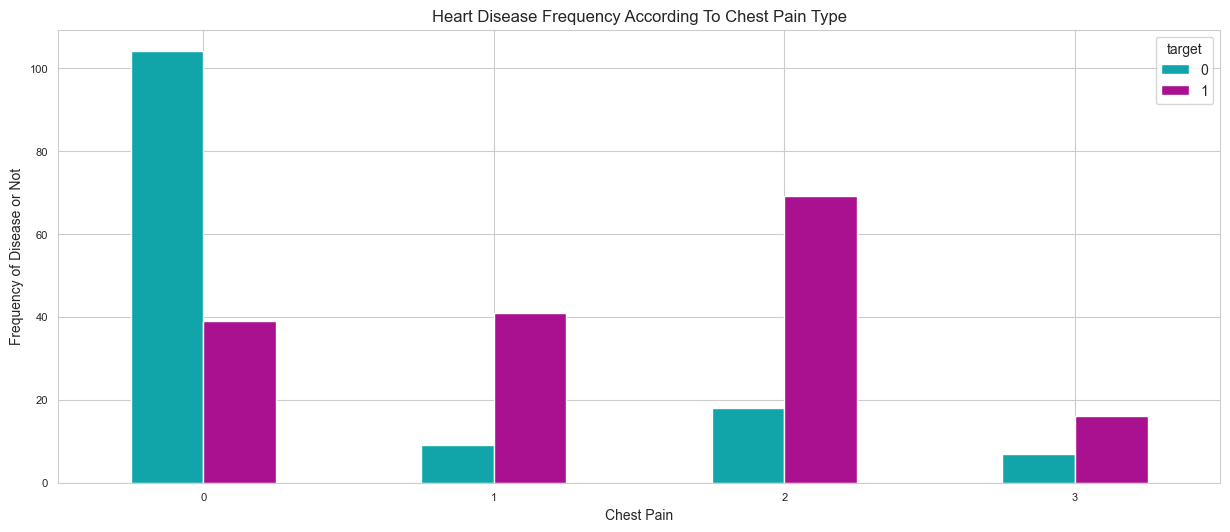

In [26]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

C:\Users\amuez\anaconda3\envs\My AIDI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

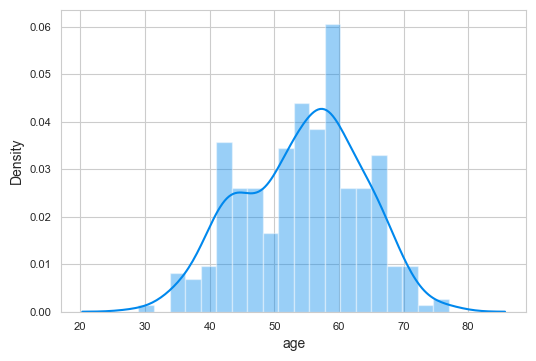

In [27]:
sns.distplot(heart['age'] , bins = 20)

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.


In [28]:
# Creating dummy variables
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")


In [29]:
frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [30]:
heart = heart.drop(columns = ['cp', 'thal', 'slope'])
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# K-Nearest Neighbour (KNN) Classification:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
y=heart['target']
x=heart.drop('target', axis=1)

In [33]:
accuracies = {}

In [34]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 60.66%


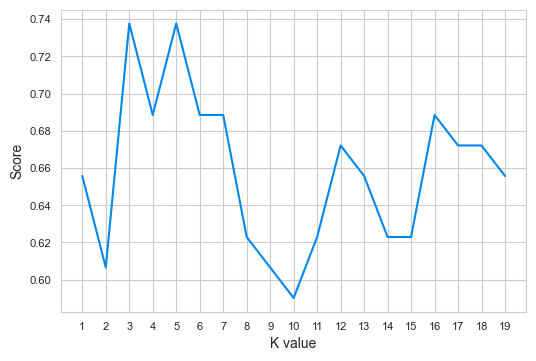

Maximum KNN Score is 73.77%


In [36]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [39]:
print(accuracies.values())

dict_values([73.77049180327869])


# Decision tree

In [40]:
x_train_cross, x_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = heart.target, random_state=1)

In [41]:
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
acc = DT.score(x_test,y_test)*100
accuracies['DT'] = acc
print("Test Accuracy of DT Algorithm: {:.2f}%".format(acc))

Test Accuracy of DT Algorithm: 78.69%


# Random forest

In [42]:
# Train/Test split
x_train_cross, x_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = heart.target, random_state=1)

In [43]:
RF= DecisionTreeClassifier()
RF.fit(x_train,y_train)
acc = RF.score(x_test,y_test)*100
accuracies['RF'] = acc
print("Test Accuracy of RF Algorithm: {:.2f}%".format(acc))

Test Accuracy of RF Algorithm: 83.61%


# Support Vector Machine (SVM) Algorithm

In [44]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


Test Accuracy of SVM Algorithm: 65.57%


# Naive Bayes Algorithm

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 83.61%


In [46]:
print(accuracies.keys())
print(accuracies.values())

dict_keys(['KNN', 'DT', 'RF', 'SVM', 'Naive Bayes'])
dict_values([73.77049180327869, 78.68852459016394, 83.60655737704919, 65.57377049180327, 83.60655737704919])


# Comparing models

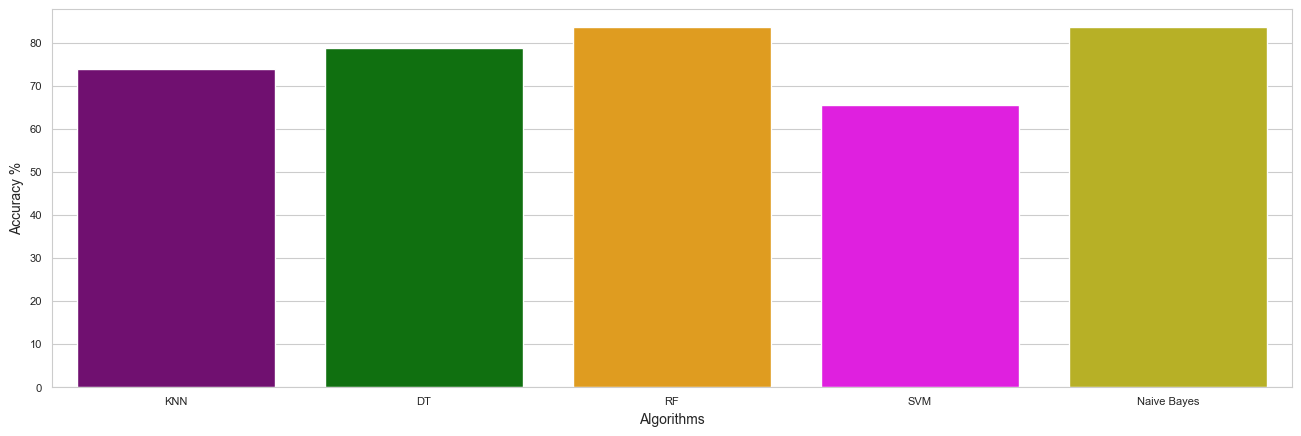

In [47]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette = colors)


Here all models are good but Naive Bayes and Random forest are working best with accuracy of 83.61%. Now let us take a look over their confusion matrix.

# Confusion Matrix

In [53]:
# Predicted values

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_DT = DT.predict(x_test)
y_head_RF = RF.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_DT = confusion_matrix(y_test,y_head_DT)
cm_RF = confusion_matrix(y_test,y_head_RF)

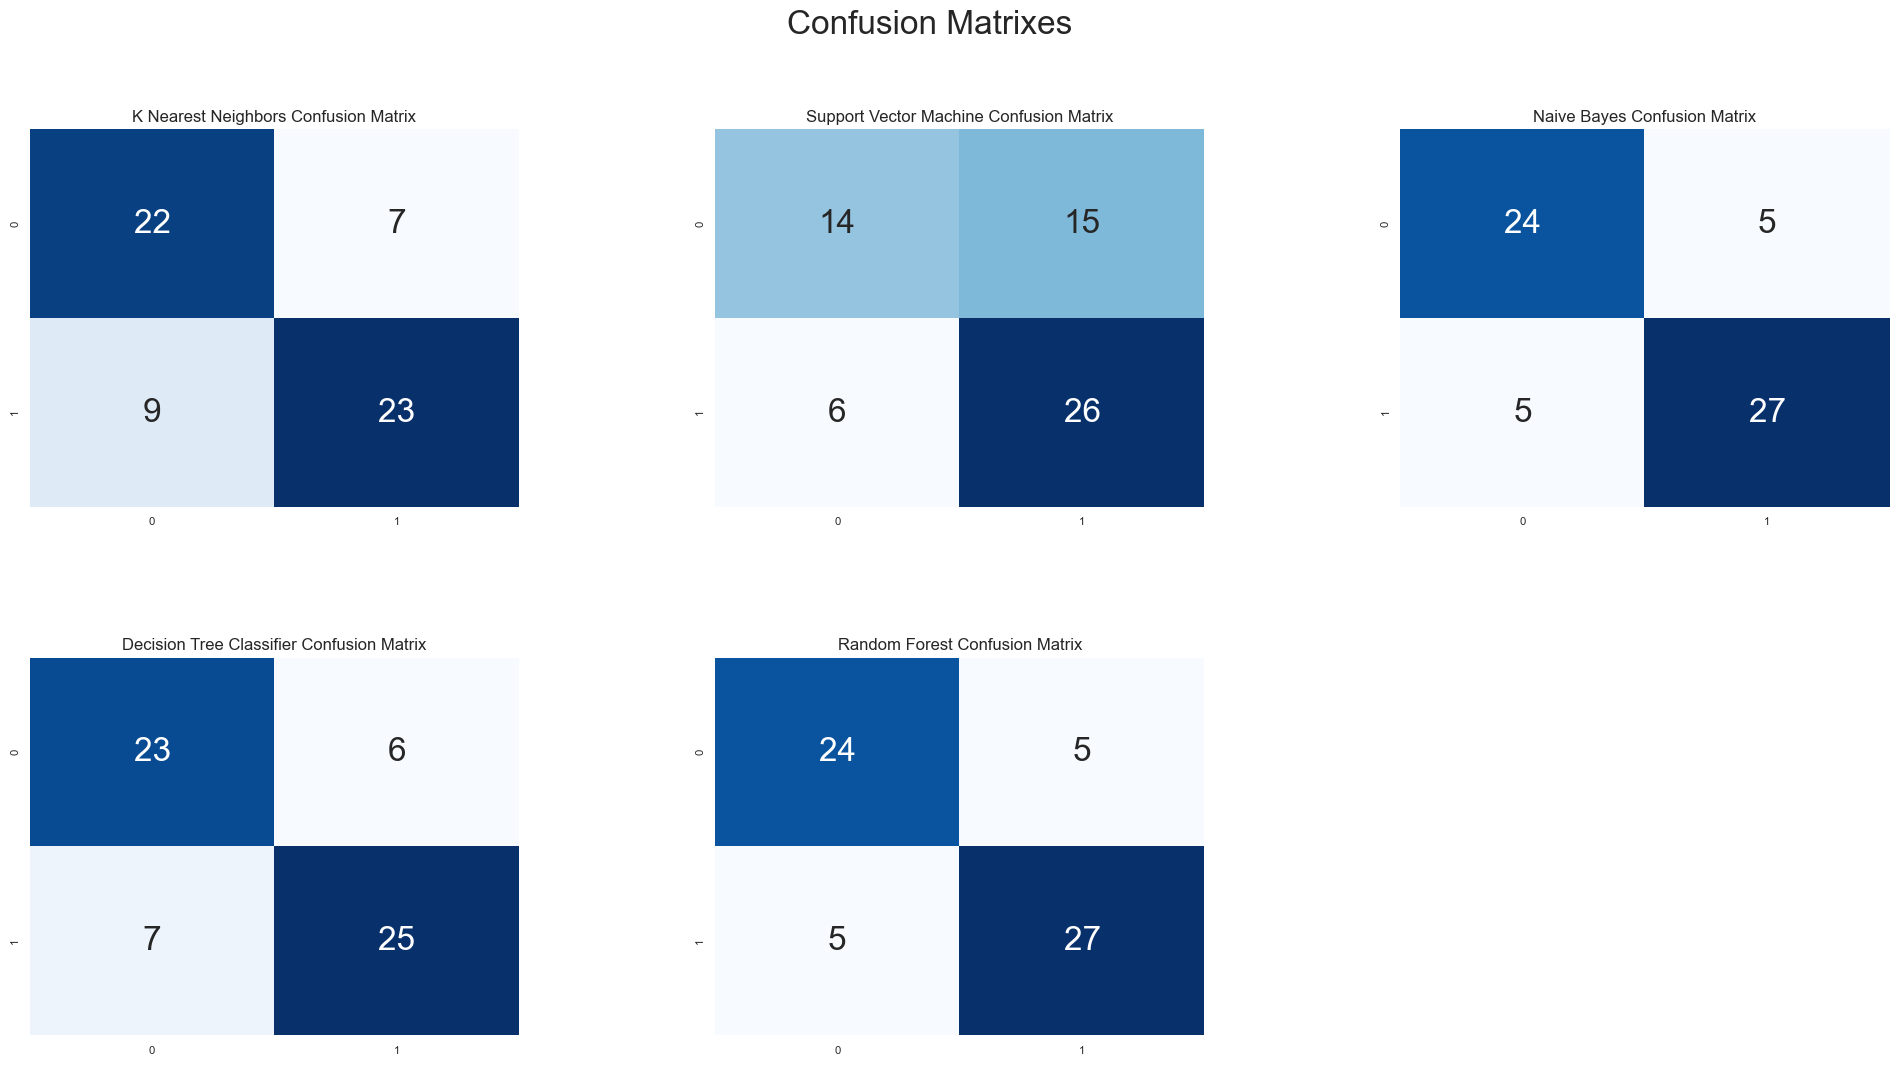

In [58]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()